In [1]:
# import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as plx
from scipy.stats import linregress
import warnings
warnings.simplefilter("ignore")
from prettytable import PrettyTable
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv('Life Expectancy Data.csv')

In [3]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
print(f'Shape of the data: {df.shape}')

Shape of the data: (2938, 22)


# EDA

#### descripitive statistics + missing values


In [5]:
# descripitive statistics + missing values
description = df.describe().round(2).transpose()  # Round to 2 decimal places 
description['missing_values'] = df.isnull().sum()
description

,count,mean,std,min,25%,50%,75%,max,missing_values
Year,2938.0,2007.52,4.61,2000.00,2004.00,2008.00,2012.00,2.015000e+03,0
Life expectancy,2928.0,69.22,9.52,36.30,63.10,72.10,75.70,8.900000e+01,10
Adult Mortality,2928.0,164.80,124.29,1.00,74.00,144.00,228.00,7.230000e+02,10
infant deaths,2938.0,30.30,117.93,0.00,0.00,3.00,22.00,1.800000e+03,0
Alcohol,2744.0,4.60,4.05,0.01,0.88,3.76,7.70,1.787000e+01,194
percentage expenditure,2938.0,738.25,1987.91,0.00,4.69,64.91,441.53,1.947991e+04,0
Hepatitis B,2385.0,80.94,25.07,1.00,77.00,92.00,97.00,9.900000e+01,553
Measles,2938.0,2419.59,11467.27,0.00,0.00,17.00,360.25,2.121830e+05,0
BMI,2904.0,38.32,20.04,1.00,19.30,43.50,56.20,8.730000e+01,34
under-five deaths,2938.0,42.04,160.45,0.00,0.00,4.00,28.00,2.500000e+03,0


In [6]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

#### Dublicates

In [7]:
duplicate_rows = df.duplicated()
print(df[duplicate_rows])
print("Total number of duplicate rows:", duplicate_rows.sum())

# number of dublicates is 0

Empty DataFrame
Columns: [Country, Year, Status, Life expectancy , Adult Mortality, infant deaths, Alcohol, percentage expenditure, Hepatitis B, Measles ,  BMI , under-five deaths , Polio, Total expenditure, Diphtheria ,  HIV/AIDS, GDP, Population,  thinness  1-19 years,  thinness 5-9 years, Income composition of resources, Schooling]
Index: []

[0 rows x 22 columns]
Total number of duplicate rows: 0


In [8]:
missing_values_count = df.isnull().sum()
print(missing_values_count)


Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64


In [9]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [10]:
df.columns = df.columns.str.strip()

In [11]:
# Impute missing values with mean for numerical columns
numerical_columns = ['Life expectancy', 'Adult Mortality', 'Alcohol', 'Hepatitis B', 'BMI', 'Polio', 'Total expenditure', 'Diphtheria',
                     'GDP', 'Population', 'thinness  1-19 years', 'thinness 5-9 years', 'Income composition of resources', 'Schooling']
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())


In [12]:
df.nunique()

Country                             193
Year                                 16
Status                                2
Life expectancy                     363
Adult Mortality                     426
infant deaths                       209
Alcohol                            1077
percentage expenditure             2328
Hepatitis B                          88
Measles                             958
BMI                                 609
under-five deaths                   252
Polio                                74
Total expenditure                   819
Diphtheria                           82
HIV/AIDS                            200
GDP                                2491
Population                         2279
thinness  1-19 years                201
thinness 5-9 years                  208
Income composition of resources     626
Schooling                           174
dtype: int64

#### Variables Distributions

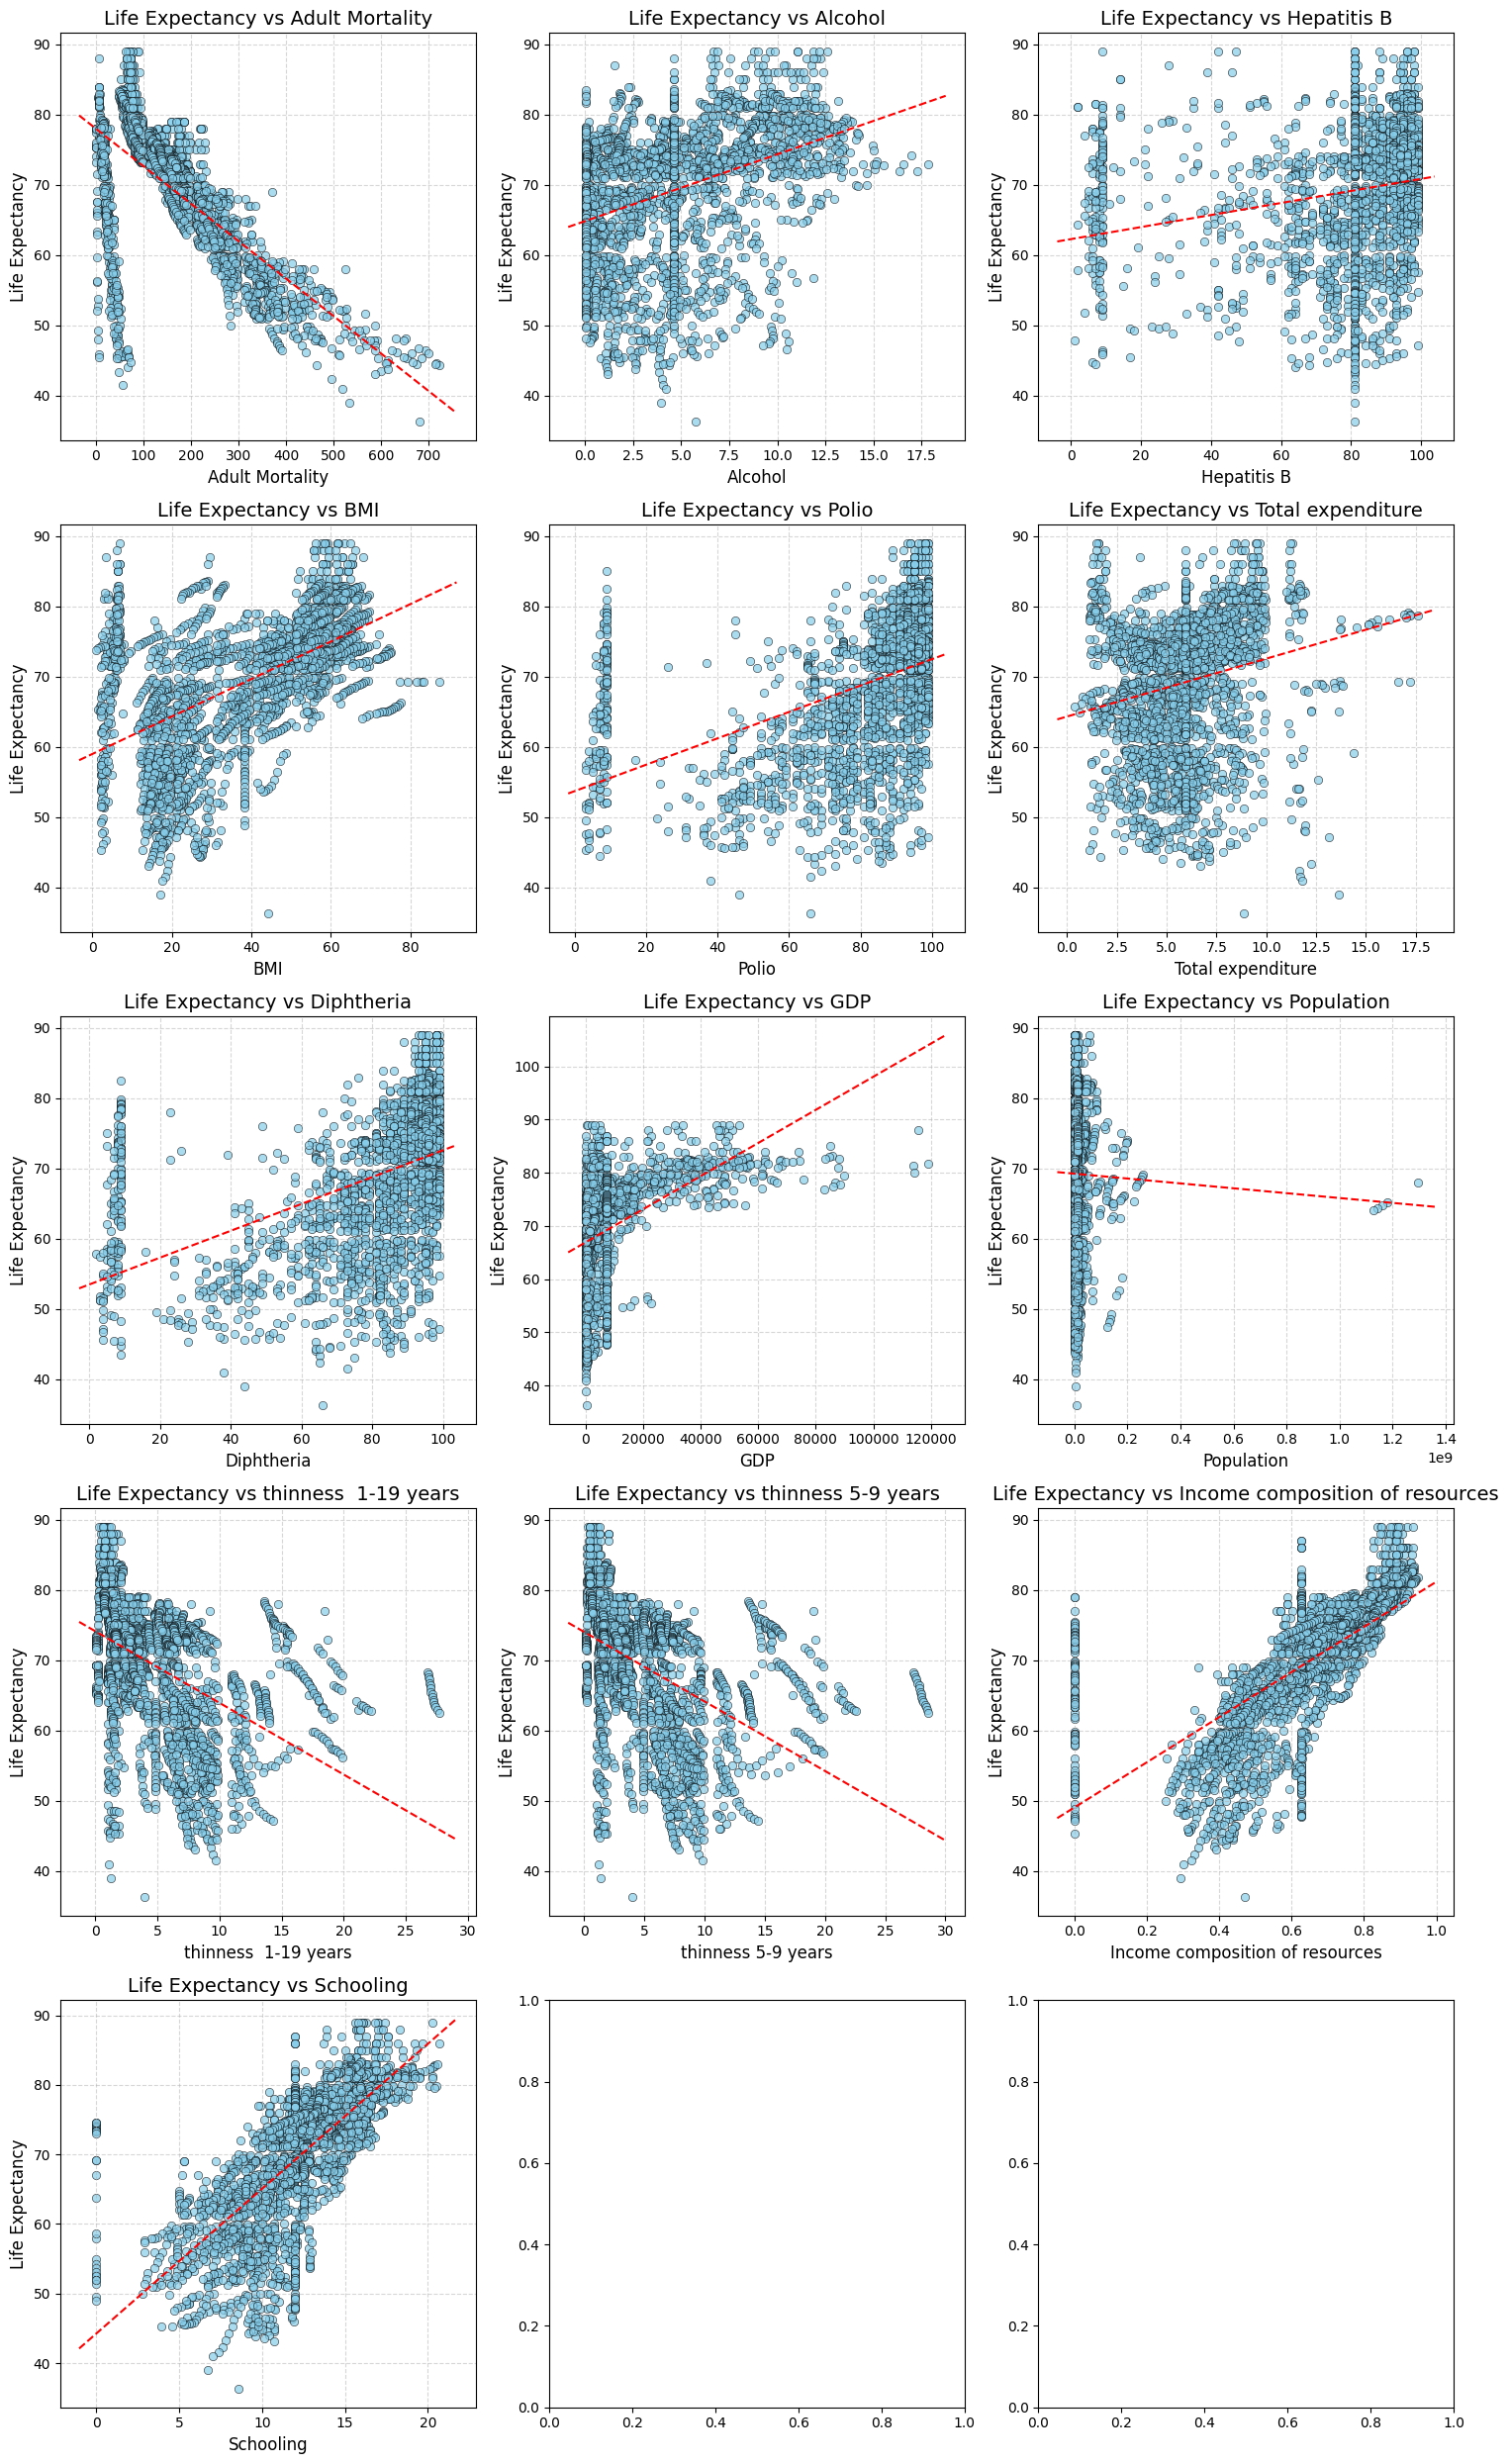

In [13]:

df1 = df.drop(columns=['Country', 'Status'])

variables_to_plot = ['Adult Mortality', 'Alcohol', 'Hepatitis B', 'BMI', 'Polio', 'Total expenditure', 'Diphtheria', 'GDP', 'Population', 'thinness  1-19 years', 'thinness 5-9 years', 'Income composition of resources', 'Schooling']

num_plots = len(variables_to_plot)
num_cols = 3
num_rows = num_plots // num_cols + (1 if num_plots % num_cols > 0 else 0)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

if num_rows == 1:
    axes = [axes]

for i, var in enumerate(variables_to_plot):
    row = i // num_cols
    col = i % num_cols
    sns.scatterplot(x=var, y='Life expectancy', data=df1, ax=axes[row][col], color='skyblue', edgecolor='black', alpha=0.7, marker='o')
    axes[row][col].set_title(f'Life Expectancy vs {var}', fontsize=14)
    axes[row][col].set_xlabel(var, fontsize=12)
    axes[row][col].set_ylabel('Life Expectancy', fontsize=12)
    axes[row][col].grid(True, linestyle='--', alpha=0.5)
    
    slope, intercept, r_value, p_value, std_err = linregress(df1[var], df1['Life expectancy'])
    x_values = np.array(axes[row][col].get_xlim())
    y_values = intercept + slope * x_values
    axes[row][col].plot(x_values, y_values, color='red', linestyle='--')

plt.tight_layout()
plt.show()


#### Correlation

In [14]:
correlation = df1.corr()
correlation

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.169623,-0.078861,-0.037415,-0.048168,0.031400,0.089398,-0.082493,0.108327,-0.042937,0.093820,0.081860,0.133853,-0.139741,0.093351,0.014951,-0.047592,-0.050627,0.236333,0.203471
Life expectancy,0.169623,1.000000,-0.696359,-0.196535,0.391598,0.381791,0.203771,-0.157574,0.559255,-0.222503,0.461574,0.207981,0.475418,-0.556457,0.430493,-0.019638,-0.472162,-0.466629,0.692483,0.715066
Adult Mortality,-0.078861,-0.696359,1.000000,0.078747,-0.190408,-0.242814,-0.138591,0.031174,-0.381449,0.094135,-0.272694,-0.110875,-0.273014,0.523727,-0.277053,-0.012501,0.299863,0.305366,-0.440062,-0.435108
infant deaths,-0.037415,-0.196535,0.078747,1.000000,-0.113812,-0.085612,-0.178783,0.501128,-0.227220,0.996629,-0.170674,-0.126564,-0.175156,0.025231,-0.107109,0.548522,0.465590,0.471228,-0.143663,-0.191757
Alcohol,-0.048168,0.391598,-0.190408,-0.113812,1.000000,0.339634,0.075447,-0.051055,0.318070,-0.110777,0.213744,0.294898,0.215242,-0.048650,0.318591,-0.030765,-0.416946,-0.405881,0.416099,0.497546
percentage expenditure,0.031400,0.381791,-0.242814,-0.085612,0.339634,1.000000,0.011679,-0.056596,0.228537,-0.087852,0.147203,0.173414,0.143570,-0.097857,0.888140,-0.024648,-0.251190,-0.252725,0.380374,0.388105
Hepatitis B,0.089398,0.203771,-0.138591,-0.178783,0.075447,0.011679,1.000000,-0.090317,0.134929,-0.184413,0.408519,0.050084,0.499958,-0.102405,0.062318,-0.109811,-0.105144,-0.108334,0.150992,0.171755
Measles,-0.082493,-0.157574,0.031174,0.501128,-0.051055,-0.056596,-0.090317,1.000000,-0.175925,0.507809,-0.136146,-0.104569,-0.141861,0.030899,-0.068060,0.236250,0.224742,0.221007,-0.115764,-0.122609
BMI,0.108327,0.559255,-0.381449,-0.227220,0.318070,0.228537,0.134929,-0.175925,1.000000,-0.237586,0.282156,0.231814,0.281059,-0.243548,0.276645,-0.063238,-0.532025,-0.538911,0.479837,0.508105
under-five deaths,-0.042937,-0.222503,0.094135,0.996629,-0.110777,-0.087852,-0.184413,0.507809,-0.237586,1.000000,-0.188703,-0.128269,-0.195651,0.038062,-0.110640,0.535864,0.467626,0.472099,-0.161533,-0.207111


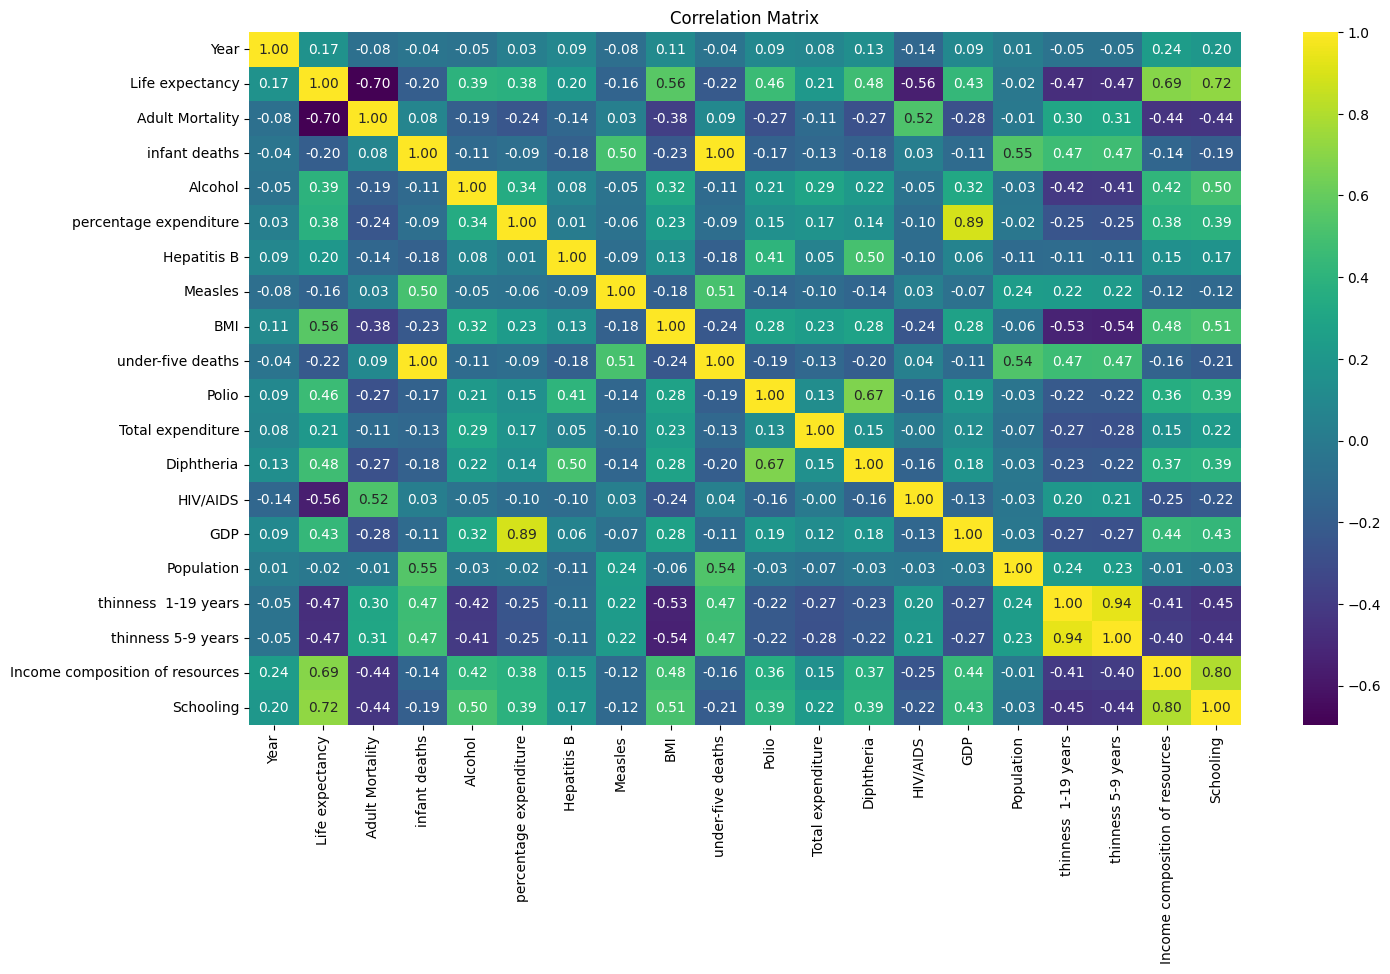

In [15]:
plt.figure(figsize=(16, 9))

sns.heatmap(correlation, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

#### From Prevoius plots we got alot of information
##### 1- infant death and under five-death are completely correlated
##### 2-The More Gdp and Total Expendture the more the life expectany rate
##### 3-The Thiness 1-19 and Thiness 5-9 have the same distribution so we will likley chose one of them for our model
##### 4-The more the country is vacinated the more the life expectancy 
##### 5-The BMI Column is not making Sense our median BMI is about 50 that means that more than half the population of our data  is severly obese and in need of medical care
##### 6-Under 5 death and infant death are practically the same column so we choose the more genralized column the under 5 column

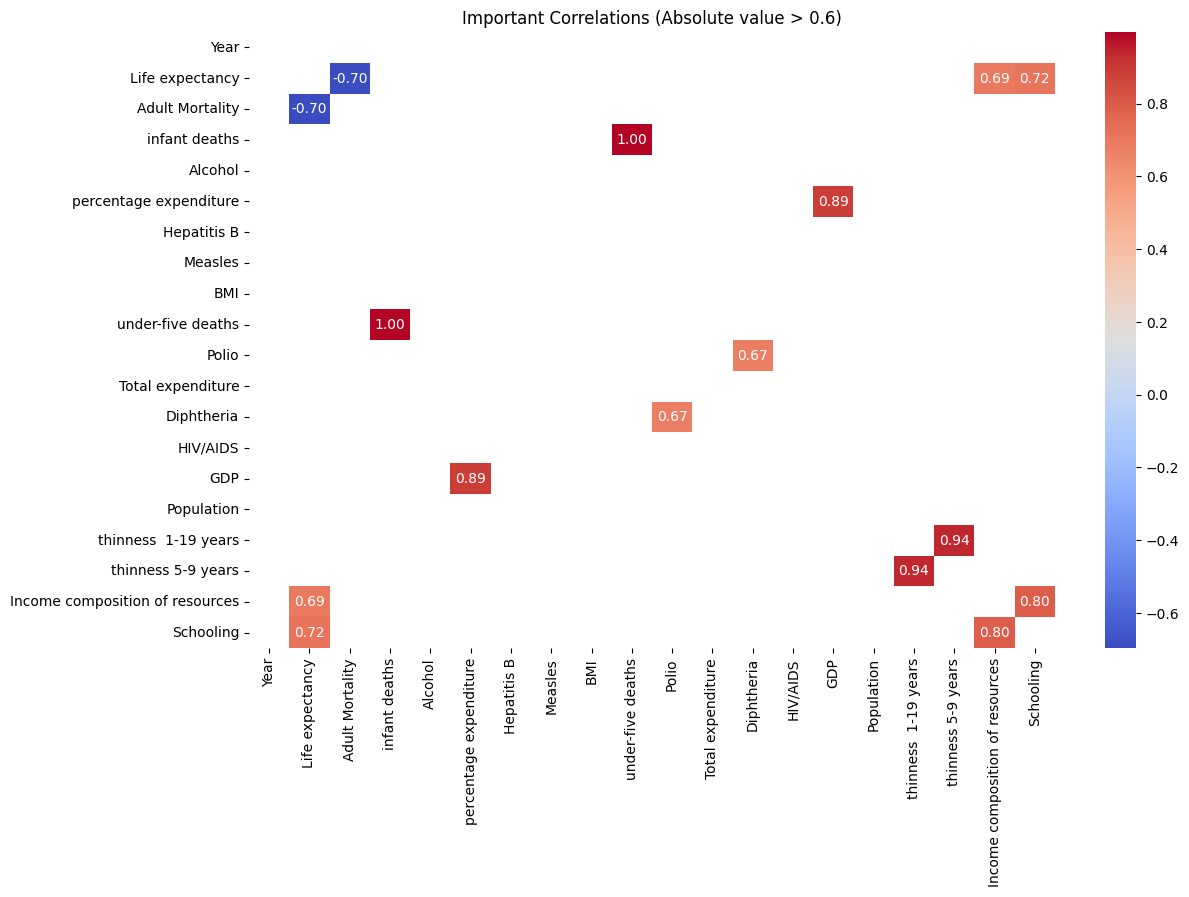

In [16]:
# Filtering important positive and negative correlations
important_correlations = correlation[(correlation.abs() > 0.6) & (correlation != 1)]

plt.figure(figsize=(13, 8))
sns.heatmap(important_correlations, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Important Correlations (Absolute value > 0.6)')
plt.show()


#### K-Means

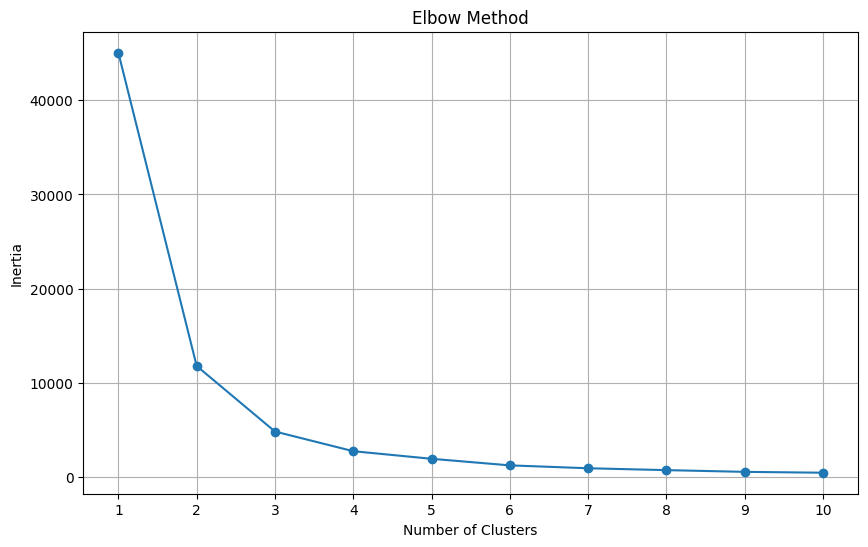

In [17]:
from sklearn.cluster import KMeans

alcohol_values = df1['Alcohol'].values.reshape(-1, 1)

max_clusters = 10
inertia_values = []

for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(alcohol_values)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_clusters + 1), inertia_values, marker='o', linestyle='-')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, max_clusters + 1))
plt.grid(True)
plt.show()


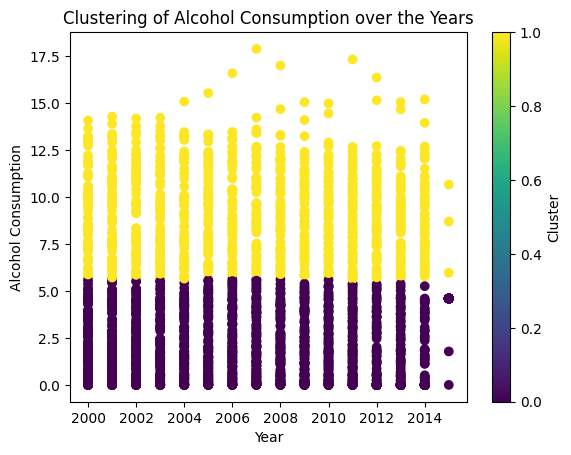

Cluster Centers:
[[2.10915348]
 [9.14035509]]


In [18]:

alcohol_data = df1['Alcohol'].values.reshape(-1, 1)  # Reshape to a 2D array as required by scikit-learn

kmeans = KMeans(n_clusters=2)  # Due to elbow method, 2 is the best number of clusters
kmeans.fit(alcohol_data)

df1['Alcohol_Cluster'] = kmeans.labels_

plt.scatter(df1['Year'], df1['Alcohol'], c=df1['Alcohol_Cluster'], cmap='viridis')
plt.xlabel('Year')
plt.ylabel('Alcohol Consumption')
plt.title('Clustering of Alcohol Consumption over the Years')
plt.colorbar(label='Cluster')
plt.show()

print("Cluster Centers:")
print(kmeans.cluster_centers_)


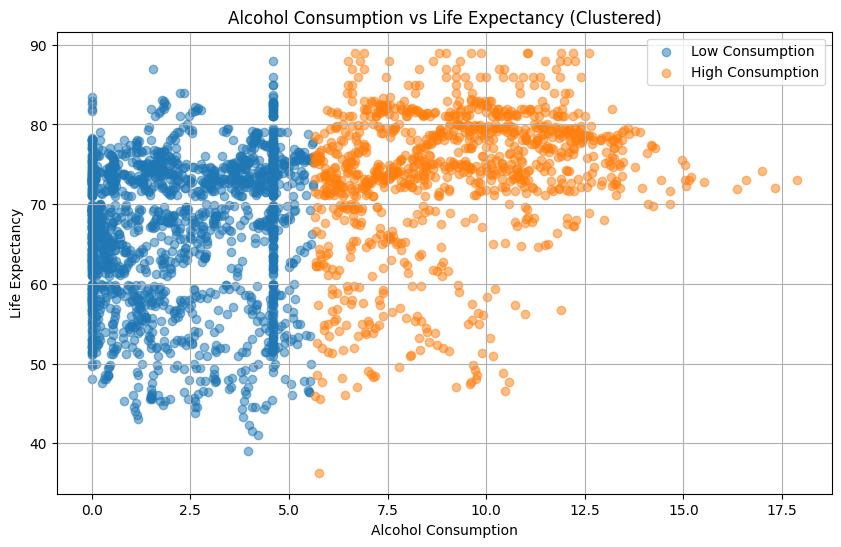

In [19]:
plt.figure(figsize=(10, 6))
for cluster in df1['Alcohol_Cluster'].unique():
    cluster_data = df1[df1['Alcohol_Cluster'] == cluster]
    if cluster == 0:
        label = 'Low Consumption'
    else:
        label = 'High Consumption'
    plt.scatter(cluster_data['Alcohol'], cluster_data['Life expectancy'], label=label, alpha=0.5)

plt.title('Alcohol Consumption vs Life Expectancy (Clustered)')
plt.xlabel('Alcohol Consumption')
plt.ylabel('Life Expectancy')
plt.legend()
plt.grid(True)
plt.show()


#### Visualization

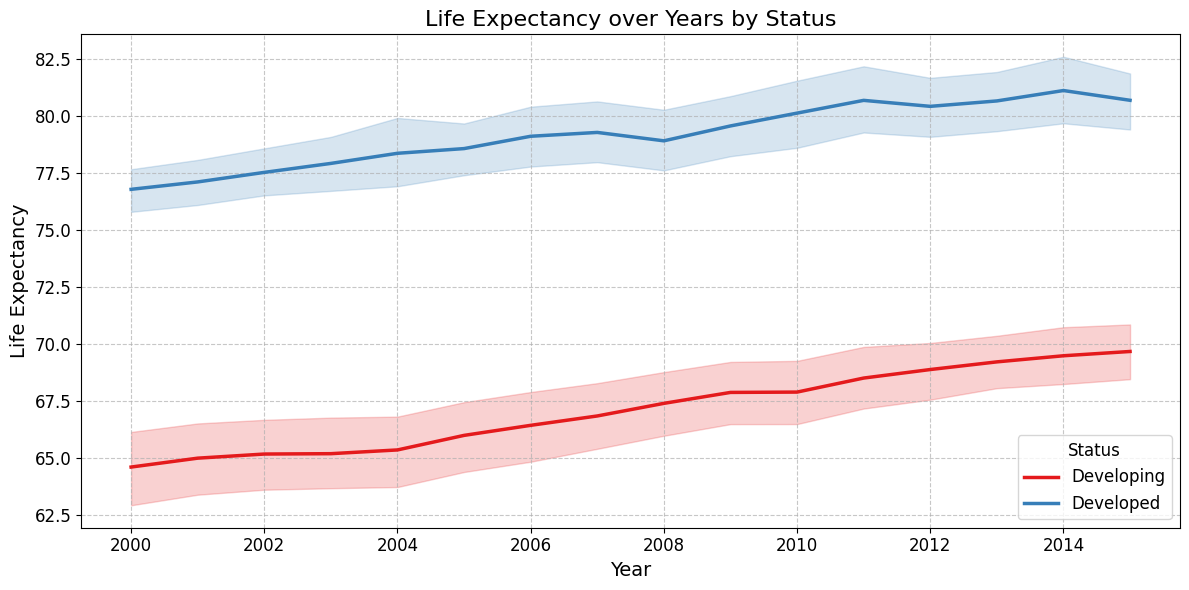

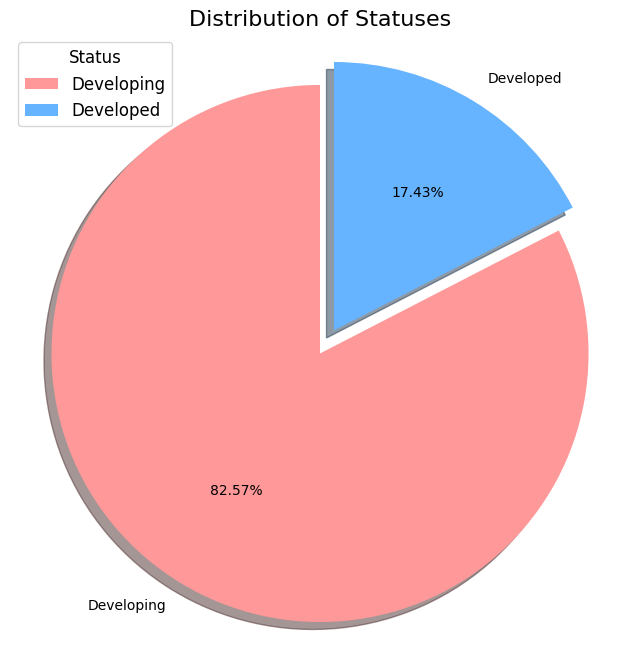

In [20]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Year', y='Life expectancy', hue='Status', palette='Set1', linewidth=2.5)
plt.title('Life Expectancy over Years by Status', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Life Expectancy', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Status', fontsize=12, title_fontsize=12, loc='lower right')
plt.tight_layout()
plt.show()


plt.figure(figsize=(8, 8))
explode = (0.1, 0)  # Explode the first slice
colors = ['#ff9999','#66b3ff']  # Custom colors
plt.pie(df['Status'].value_counts(), labels=df['Status'].value_counts().index, autopct='%.2f%%', shadow=True, startangle=90, explode=explode, colors=colors)
plt.title('Distribution of Statuses', fontsize=16)
plt.axis('equal')  
plt.legend(title='Status', fontsize=12, title_fontsize=12)
plt.show()



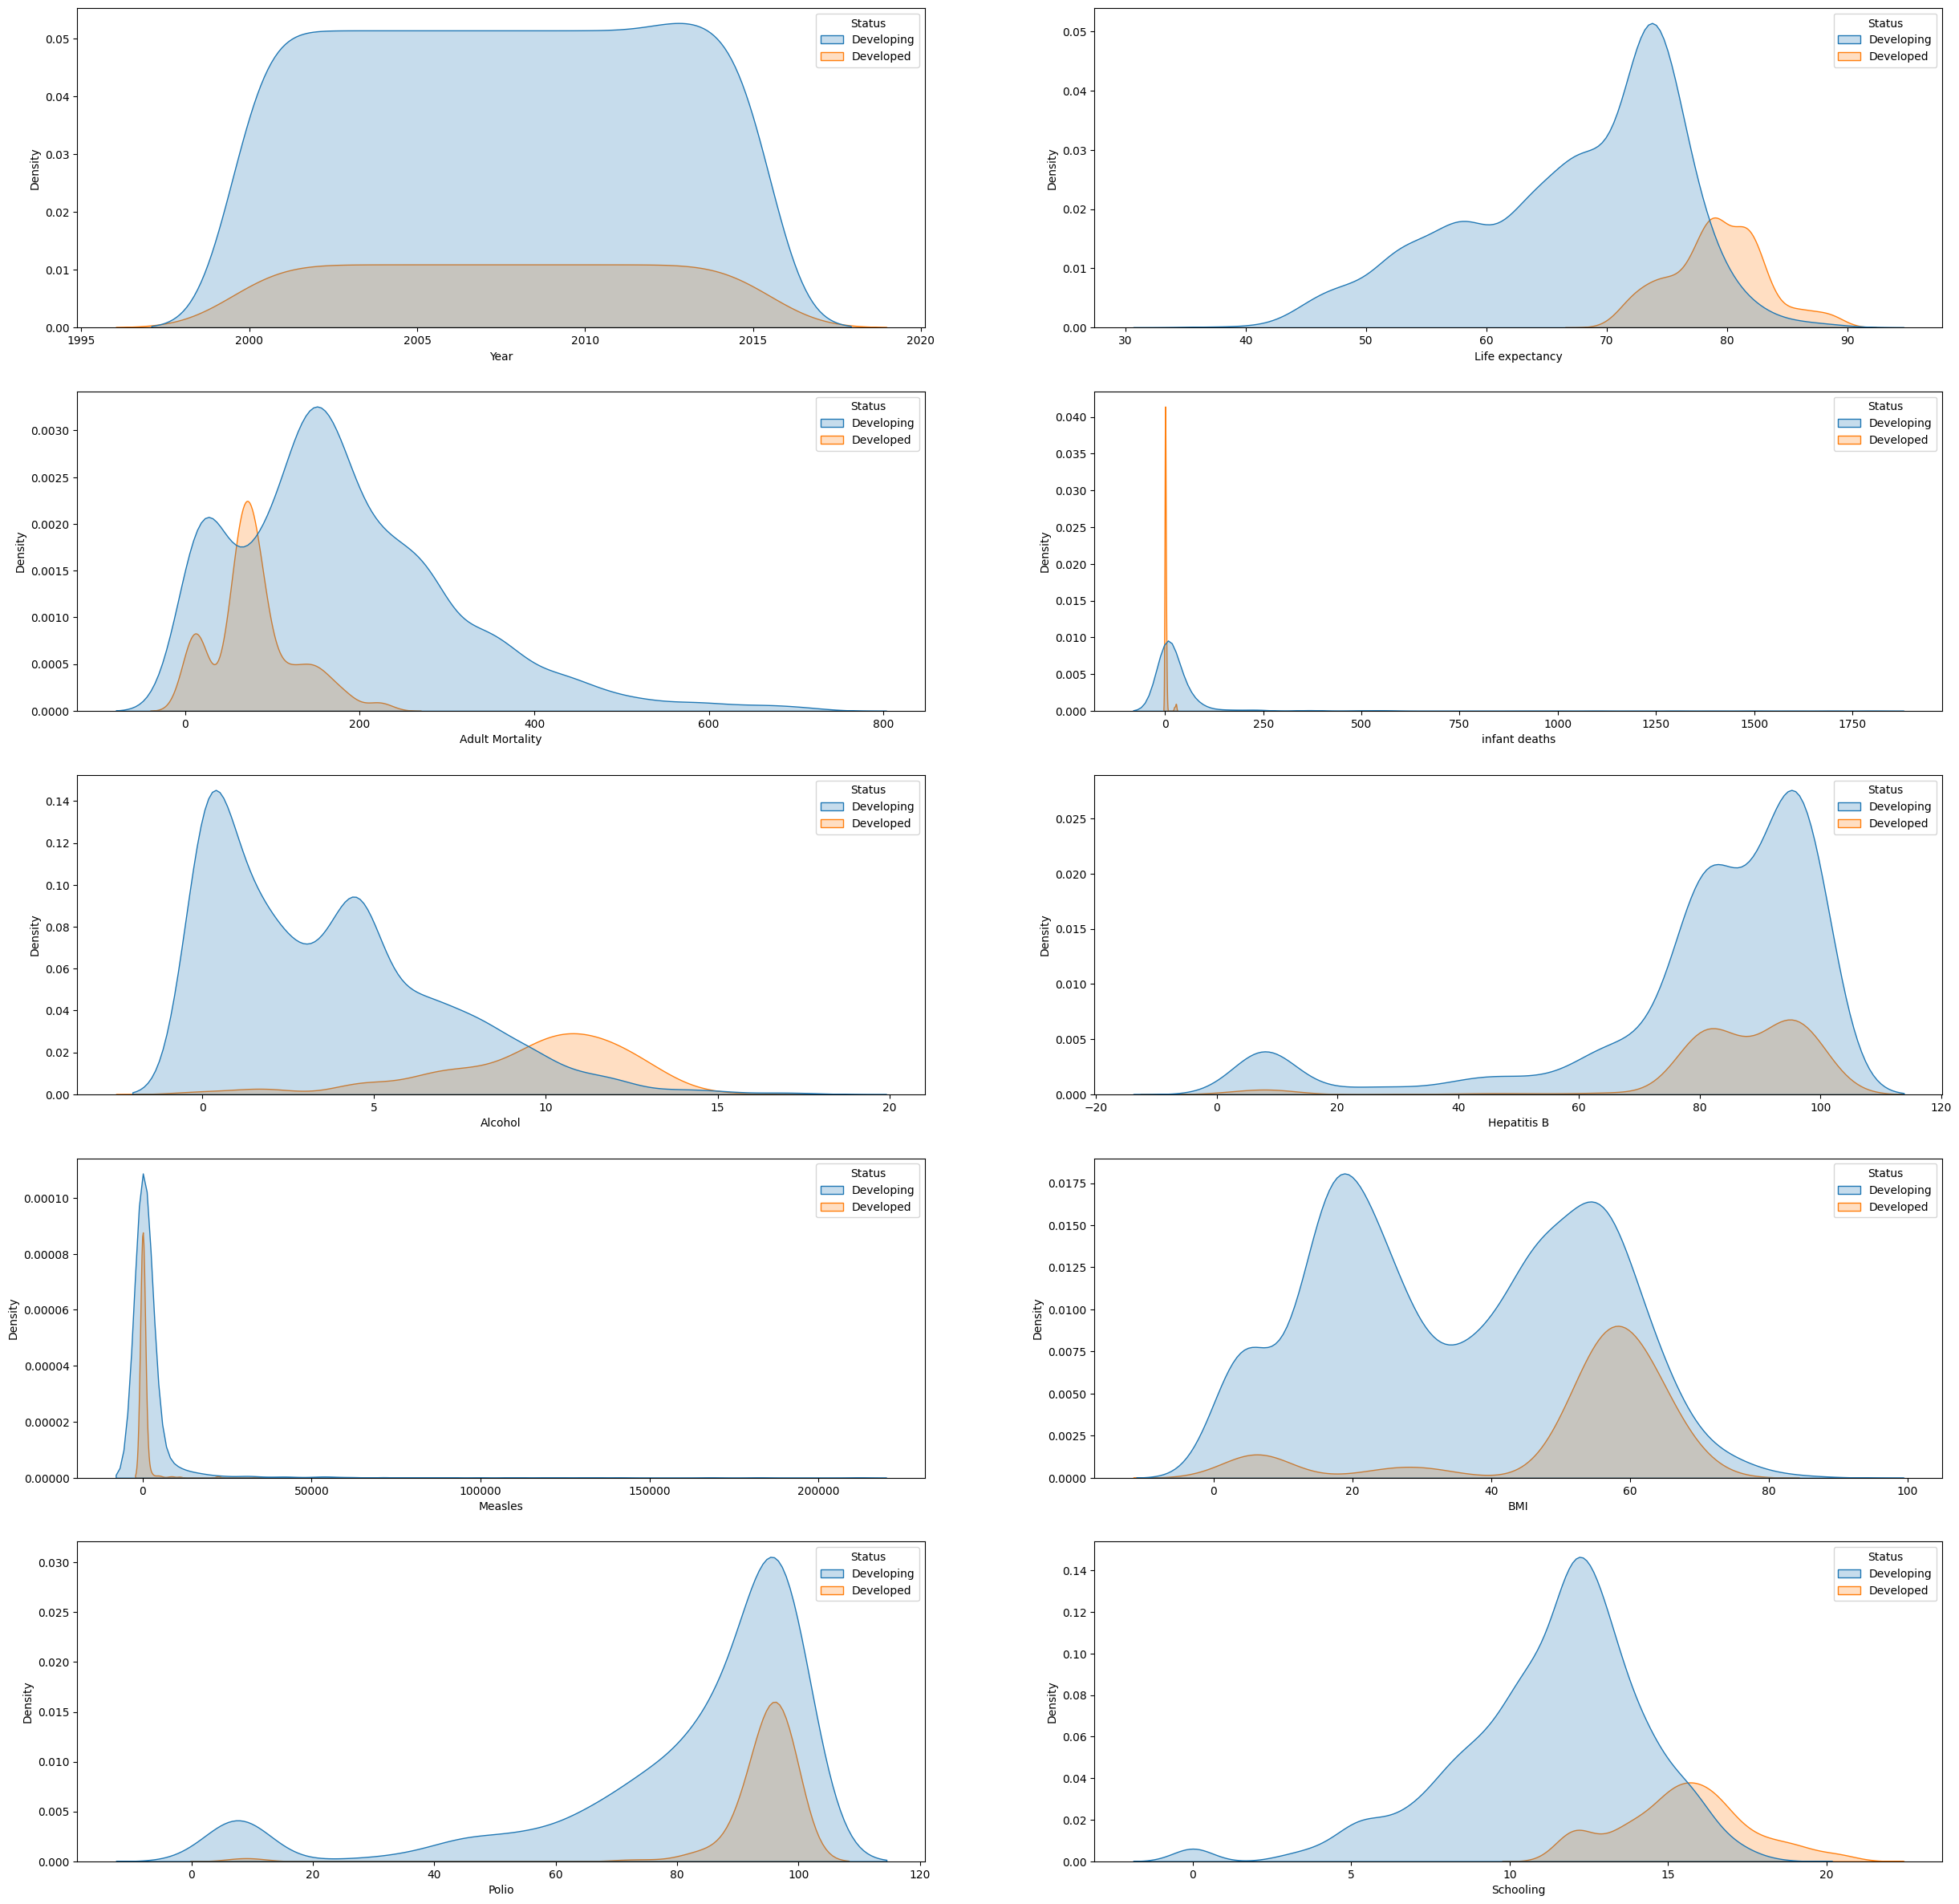

In [21]:
num_cols=['Year', 'Life expectancy', 'Adult Mortality', 'infant deaths', 'Alcohol', 'Hepatitis B', 'Measles', 'BMI','Polio', 'Schooling']
fig = plt.figure(figsize=(30,30))

c = 0

for col in num_cols:
    sub = fig.add_subplot(5,2,c+1)
    g = sns.kdeplot(x=col,data=df,fill=True,hue="Status")
    c = c + 1

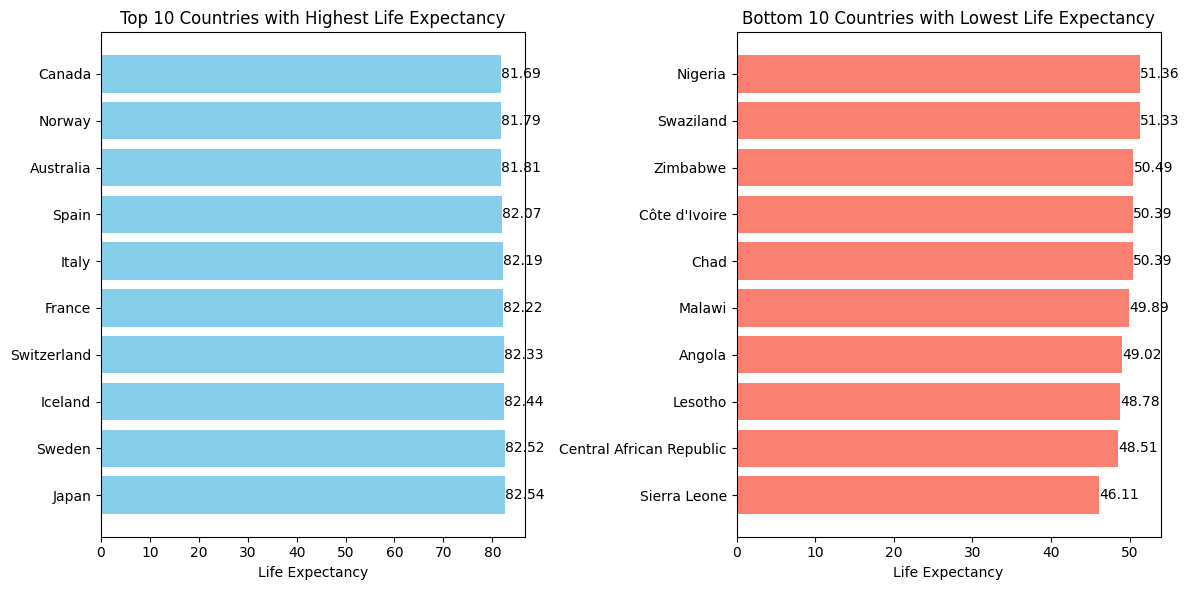

In [22]:

top_data = pd.DataFrame(df.groupby('Country')['Life expectancy'].mean().sort_values(ascending=False).head(10))
bottom_data = pd.DataFrame(df.groupby('Country')['Life expectancy'].mean().sort_values(ascending=True).head(10))

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  
bars1 = plt.barh(top_data.index, top_data['Life expectancy'], color='skyblue')
plt.xlabel('Life Expectancy')
plt.title('Top 10 Countries with Highest Life Expectancy')

for bar in bars1:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
             f'{bar.get_width():.2f}', va='center', ha='left')

plt.subplot(1, 2, 2)  
bars2 = plt.barh(bottom_data.index, bottom_data['Life expectancy'], color='salmon')
plt.xlabel('Life Expectancy')
plt.title('Bottom 10 Countries with Lowest Life Expectancy')

for bar in bars2:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
             f'{bar.get_width():.2f}', va='center', ha='left')

plt.tight_layout()
plt.show()



#### Feature importance

##### Random Forest

In [23]:
from sklearn.ensemble import RandomForestRegressor

X1 = df1.drop(columns=['Life expectancy'])
y1 = df1['Life expectancy']

rf = RandomForestRegressor()

# Fit the model
rf.fit(X1, y1)

# Get feature importances
feature_importances = pd.DataFrame({'Feature': X1.columns, 'Importance': rf.feature_importances_})

feature_importances = feature_importances.sort_values(by='Importance', ascending=False)



table = PrettyTable(["Feature", "Importance"])

for index, row in feature_importances.head(10).iterrows():
    table.add_row([row['Feature'], round(row['Importance'], 4)])
table.align = "l"
print(table)

+---------------------------------+------------+
| Feature                         | Importance |
+---------------------------------+------------+
| HIV/AIDS                        | 0.5972     |
| Income composition of resources | 0.1517     |
| Adult Mortality                 | 0.1409     |
| Schooling                       | 0.024      |
| under-five deaths               | 0.0156     |
| BMI                             | 0.0113     |
| thinness 5-9 years              | 0.0077     |
| Alcohol                         | 0.0076     |
| Year                            | 0.0075     |
| thinness  1-19 years            | 0.006      |
+---------------------------------+------------+


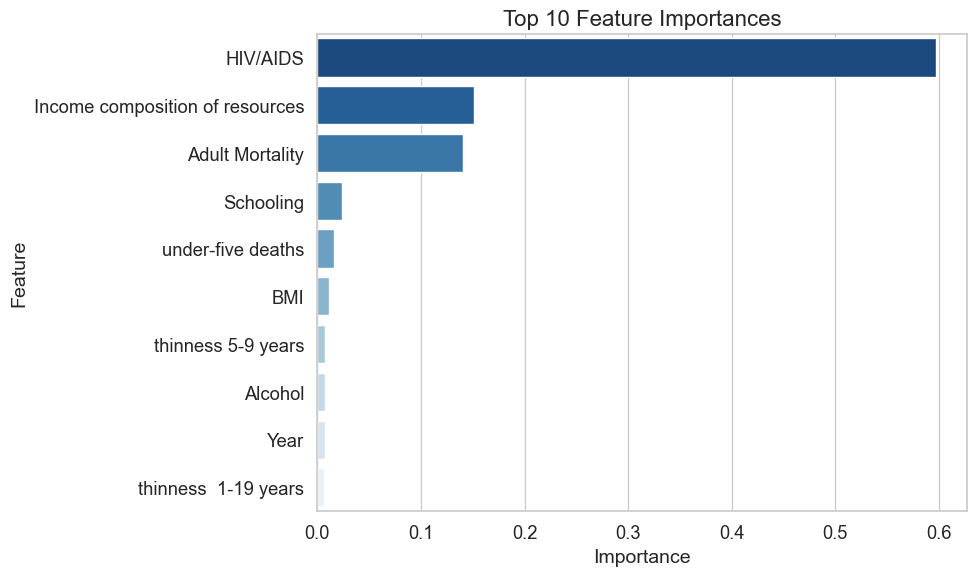

In [24]:
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.2)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(10), palette='Blues_r')
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.title('Top 10 Feature Importances', fontsize=16)
plt.tight_layout()  
plt.show()


##### ANOVA F-value

In [25]:
from sklearn.feature_selection import SelectKBest, f_classif

X2 = df1.drop(columns=['Life expectancy'])
y2 = df1['Life expectancy']

# Initialize SelectKBest with ANOVA F-value
selector = SelectKBest(score_func=f_classif, k=5)  # Select top 5 features

X_selected = selector.fit_transform(X2, y2)
selected_indices = selector.get_support(indices=True)
selected_features = X2.columns[selected_indices]

print("Selected features using ANOVA F-value:")
print(selected_features)


Selected features using ANOVA F-value:
Index(['Adult Mortality', 'percentage expenditure', 'HIV/AIDS',
       'Income composition of resources', 'Schooling'],
      dtype='object')


#### Outlier Detection

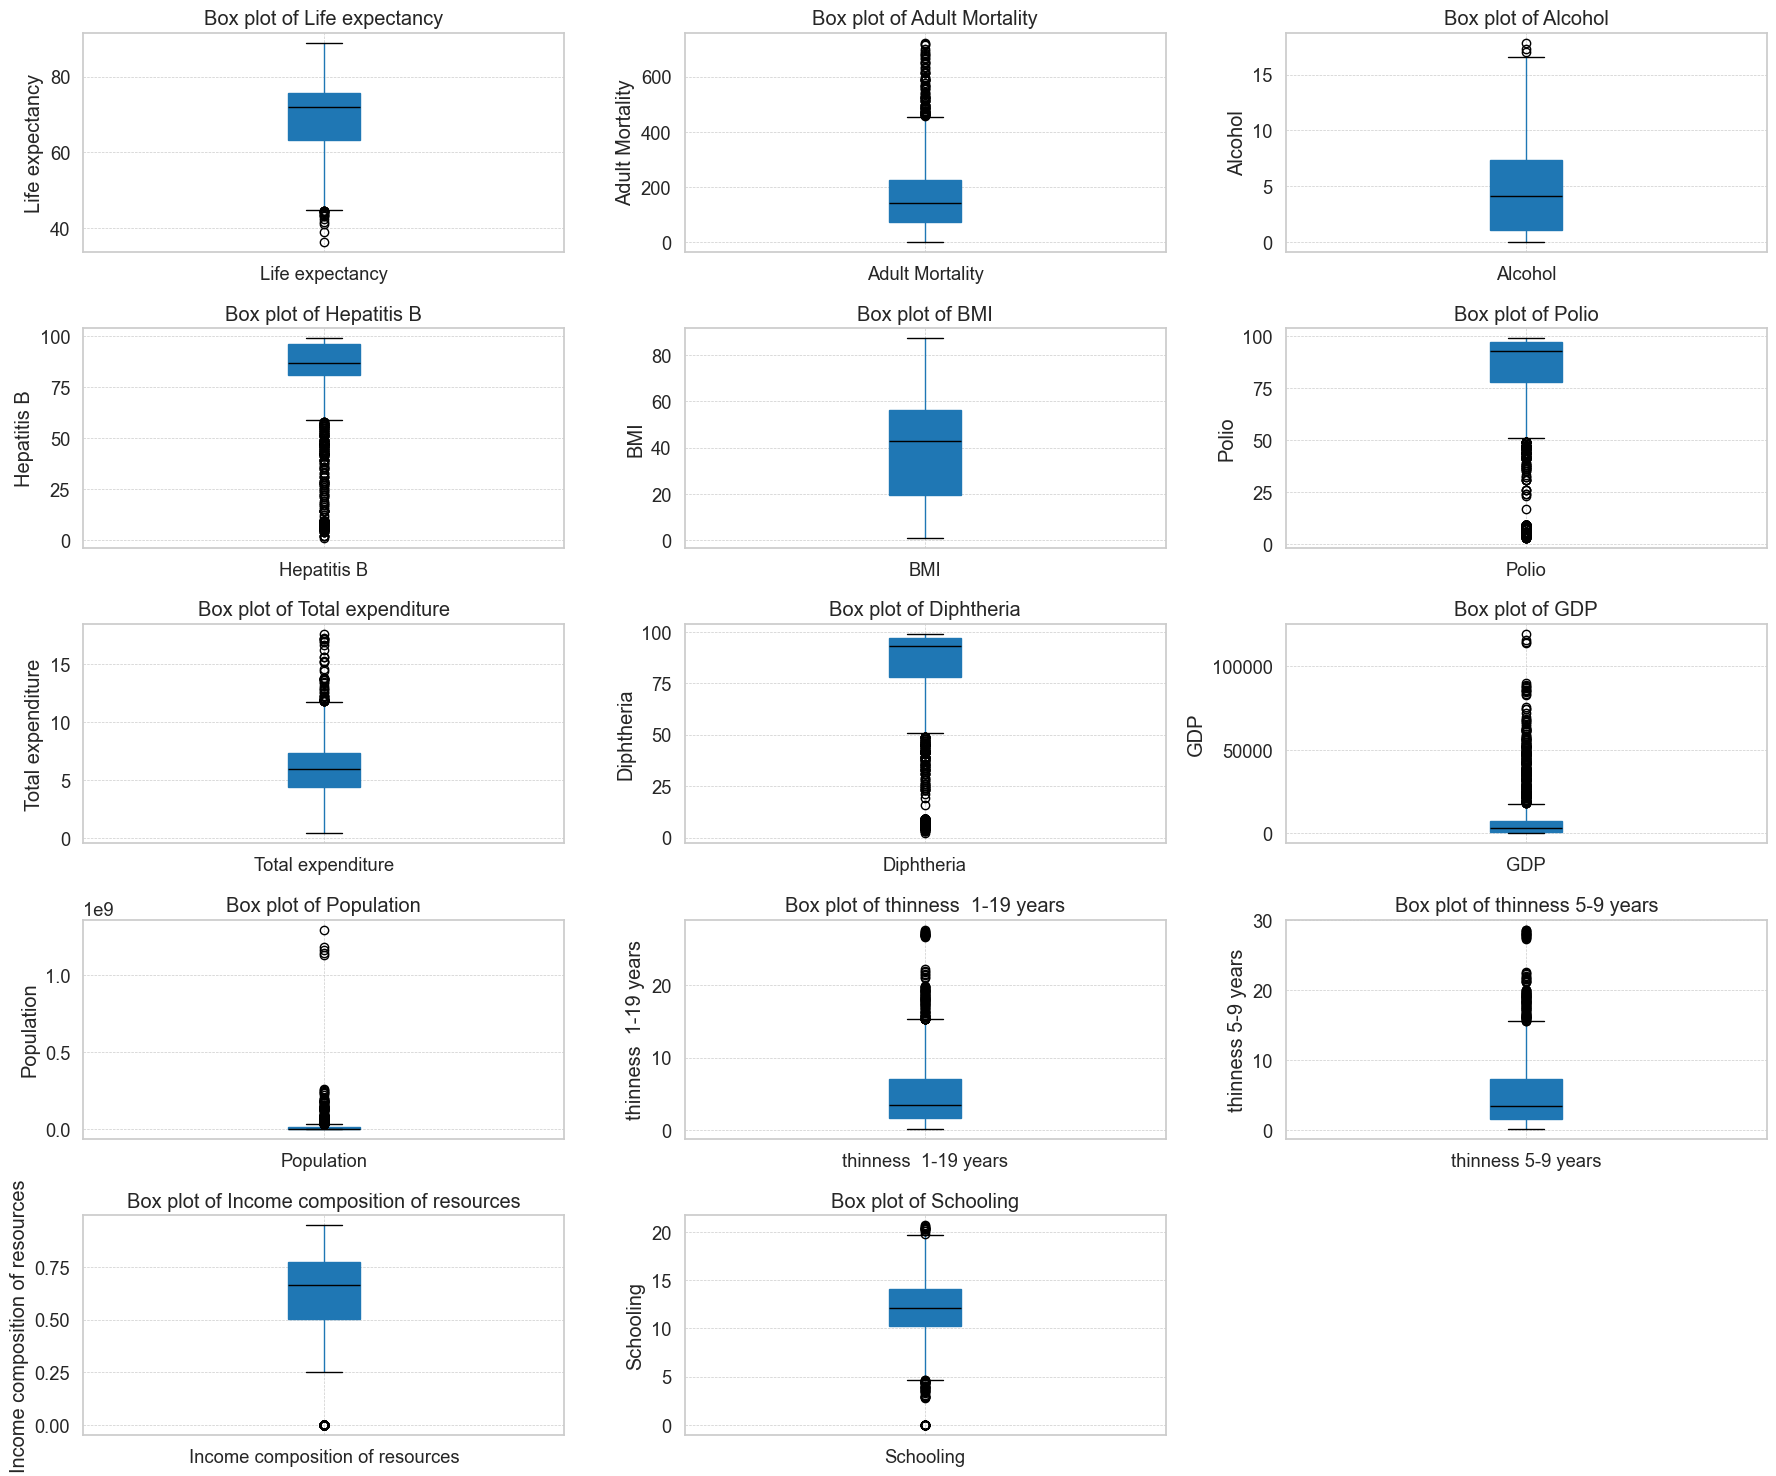

In [26]:
num_cols = 3
num_rows = -(-len(numerical_columns) // num_cols)  

fig_width = min(num_cols * 6, 18)
fig_height = min(num_rows * 5, 15)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(fig_width, fig_height))
for i, column in enumerate(numerical_columns):
    ax = axes[i // num_cols, i % num_cols] if len(numerical_columns) > 1 else axes  
    df.boxplot(column=column, ax=ax, showfliers=True, patch_artist=True, medianprops=dict(color="black"))
    ax.set_title(f'Box plot of {column}')
    ax.set_xlabel('')  # Remove x-label to avoid overlap
    ax.set_ylabel(column)
    ax.grid(True, linestyle='--', linewidth=0.5)

if len(numerical_columns) % num_cols != 0:
    for j in range(len(numerical_columns) % num_cols, num_cols):
        fig.delaxes(axes[-1, j])

plt.tight_layout()
plt.show()

In [27]:
from scipy.stats import chi2

def mahalanobis_distance(x, mean, cov):
    x_minus_mean = x - mean
    inv_cov_matrix = np.linalg.inv(cov)
    left_term = np.dot(x_minus_mean, inv_cov_matrix)
    mahal = np.dot(left_term, x_minus_mean.T)
    return mahal.diagonal()

def detect_outliers(df, numerical_columns, alpha=0.05):
    # Compute mean and covariance matrix
    mean = df[numerical_columns].mean().values
    cov_matrix = np.cov(df[numerical_columns].values, rowvar=False)
    
    # Calculate Mahalanobis distance for each data point
    mahal_distances = mahalanobis_distance(df[numerical_columns].values, mean, cov_matrix)
    
    # Calculate Chi-square threshold for given alpha and degrees of freedom
    chi2_threshold = chi2.ppf(1 - alpha, len(numerical_columns))
    
    outliers_mask = mahal_distances > chi2_threshold
    
    return outliers_mask

outliers_mask = detect_outliers(df, numerical_columns)

num_outliers = outliers_mask.sum()
print("Number of outliers:", num_outliers)



Number of outliers: 487


In [28]:
outliers_mask = detect_outliers(df, numerical_columns)

print("Outliers mask:", outliers_mask)

# Remove outliers from the dataframe
df_cleaned = df[~outliers_mask]

print("Shape of cleaned dataframe:", df_cleaned.shape)


Outliers mask: [ True False False ...  True  True False]
Shape of cleaned dataframe: (2451, 22)


#### Final Preparation

In [29]:
country_dummies = pd.get_dummies(df_cleaned['Country'])
status_dummies = pd.get_dummies(df_cleaned['Status'])

df_with_dummies = pd.concat([df_cleaned, country_dummies, status_dummies], axis=1)

df_with_dummies.drop(['Country', 'Status'], axis=1, inplace=True)

In [30]:
df_with_dummies.head(10)

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe,Developed,Developing
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,...,False,False,False,False,False,False,False,False,False,True
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,...,False,False,False,False,False,False,False,False,False,True
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,...,False,False,False,False,False,False,False,False,False,True
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,...,False,False,False,False,False,False,False,False,False,True
5,2010,58.8,279.0,74,0.01,79.679367,66.0,1989,16.7,102,...,False,False,False,False,False,False,False,False,False,True
6,2009,58.6,281.0,77,0.01,56.762217,63.0,2861,16.2,106,...,False,False,False,False,False,False,False,False,False,True
7,2008,58.1,287.0,80,0.03,25.873925,64.0,1599,15.7,110,...,False,False,False,False,False,False,False,False,False,True
8,2007,57.5,295.0,82,0.02,10.910156,63.0,1141,15.2,113,...,False,False,False,False,False,False,False,False,False,True
9,2006,57.3,295.0,84,0.03,17.171518,64.0,1990,14.7,116,...,False,False,False,False,False,False,False,False,False,True
10,2005,57.3,291.0,85,0.02,1.388648,66.0,1296,14.2,118,...,False,False,False,False,False,False,False,False,False,True


In [31]:
df2= df_with_dummies.copy()

In [32]:
df2['BMI'].describe()
#BMI column does not make sense

count    2451.000000
mean       39.521284
std        19.637157
min         1.000000
25%        21.700000
50%        45.300000
75%        56.500000
max        87.300000
Name: BMI, dtype: float64

![Image Title](WHO-BMI-chart-for-adults.PNG)


In [33]:
df2.drop(columns=['thinness  1-19 years','BMI','infant deaths'],inplace=True)

## Model

In [34]:
X = df2.drop(['Life expectancy'], axis=1)  
y = df2['Life expectancy']


from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=14)  # Choose the number of components
X_pca = pca.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

print("The Shape of X_train is :",X_train.shape)
print("The Shape of y_train is :",y_train.shape)
print("The Shape of X_test is :",X_test.shape)
print("The Shape of y_test is :",y_test.shape)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_pred)

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)




The Shape of X_train is : (1960, 14)
The Shape of y_train is : (1960,)
The Shape of X_test is : (491, 14)
The Shape of y_test is : (491,)


In [35]:
from tabulate import tabulate

mae = mean_absolute_error(y_test, y_pred)

metrics_data = [
    ["R-squared", r_squared],
    ["Mean Squared Error", mse],
    ["Mean Absolute Error", mae]
]

print(tabulate(metrics_data, headers=["Metric", "Value"], tablefmt="fancy_grid"))


╒═════════════════════╤═══════════╕
│ Metric              │     Value │
╞═════════════════════╪═══════════╡
│ R-squared           │  0.868166 │
├─────────────────────┼───────────┤
│ Mean Squared Error  │ 11.3894   │
├─────────────────────┼───────────┤
│ Mean Absolute Error │  2.57812  │
╘═════════════════════╧═══════════╛


#### Durbin-Watson test for autocorrelation

In [48]:
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson

# Perform the Durbin-Watson test
dw_statistic = durbin_watson(y_pred - y_test)
print("Durbin-Watson statistic:", dw_statistic)

residuals = y_test - y_pred

df_lagged = df2.copy()
df_lagged['residual_lag1'] = residuals.shift(1)
df_lagged = df_lagged.dropna()  # Drop rows with NaN values due to the shift

X_lagged = df_lagged.drop(['Life expectancy'], axis=1)
y_lagged = df_lagged['Life expectancy']

X_lagged_scaled = scaler.fit_transform(X_lagged)

X_lagged_pca = pca.fit_transform(X_lagged_scaled)

X_train_lagged, X_test_lagged, y_train_lagged, y_test_lagged = train_test_split(X_lagged_pca, y_lagged, test_size=0.2, random_state=42)

model_lagged = LinearRegression()
model_lagged.fit(X_train_lagged, y_train_lagged)

y_pred_lagged = model_lagged.predict(X_test_lagged)

mse_lagged = mean_squared_error(y_test_lagged, y_pred_lagged)
r_squared_lagged = r2_score(y_test_lagged, y_pred_lagged)
mae_lagged = mean_absolute_error(y_test_lagged, y_pred_lagged)

print("New Mean Squared Error (MSE):", mse_lagged)
print("New R-squared:", r_squared_lagged)
print("New Mean Absolute Error (MAE):", mae_lagged)


Durbin-Watson statistic: 1.9230661126490567
New Mean Squared Error (MSE): 12.816061964311006
New R-squared: 0.873920805552095
New Mean Absolute Error (MAE): 2.7196955553513975


In [36]:
from sklearn.decomposition import FactorAnalysis
from sklearn.metrics import mean_squared_error, r2_score

fa = FactorAnalysis(n_components=10)  # Choose the number of factors
X_factors = fa.fit_transform(X_scaled)

X_train_fa, X_test_fa, y_train_fa, y_test_fa = train_test_split(X_factors, y, test_size=0.2, random_state=42)

model_fa = LinearRegression()
model_fa.fit(X_train_fa, y_train_fa)

y_pred_fa = model_fa.predict(X_test_fa)
mse_fa = mean_squared_error(y_test_fa, y_pred_fa)
r_squared_fa = r2_score(y_test_fa, y_pred_fa)


In [37]:
# Create a list of lists containing the evaluation metrics and their corresponding values
metrics_data = [
    ["Original Model with PCA", r_squared, mse, mae],
    ["Model with Factor Analysis", r_squared_fa, mse_fa, mean_absolute_error(y_test_fa, y_pred_fa)]
]

print(tabulate(metrics_data, headers=["Model", "R-squared", "Mean Squared Error", "Mean Absolute Error"], tablefmt="fancy_grid"))


╒════════════════════════════╤═════════════╤══════════════════════╤═══════════════════════╕
│ Model                      │   R-squared │   Mean Squared Error │   Mean Absolute Error │
╞════════════════════════════╪═════════════╪══════════════════════╪═══════════════════════╡
│ Original Model with PCA    │    0.868166 │              11.3894 │               2.57812 │
├────────────────────────────┼─────────────┼──────────────────────┼───────────────────────┤
│ Model with Factor Analysis │    0.8271   │              14.9372 │               2.85591 │
╘════════════════════════════╧═════════════╧══════════════════════╧═══════════════════════╛


In [38]:
from sklearn.ensemble import RandomForestRegressor
# Train the Random Forest regression model
rf = RandomForestRegressor()
model_rf = rf.fit(X_train, y_train)

r_squared_rf = model_rf.score(X_test, y_test)

n = X_test.shape[0]
p = X_test.shape[1]
r_squared_adj = 1 - (1 - r_squared_rf) * (n - 1) / (n - p - 1)

metrics_rf_data = [
    ["Random Forest Model", r_squared_rf, r_squared_adj]
]
print(tabulate(metrics_rf_data, headers=["Model", "R-squared", "Adjusted R-squared"], tablefmt="fancy_grid"))


╒═════════════════════╤═════════════╤══════════════════════╕
│ Model               │   R-squared │   Adjusted R-squared │
╞═════════════════════╪═════════════╪══════════════════════╡
│ Random Forest Model │    0.940845 │             0.939105 │
╘═════════════════════╧═════════════╧══════════════════════╛
